In [1]:
# Importing all the libraries for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Extraction Process from csv to pandas dataframe
df = pd.read_csv("price_train.csv")
df.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,...,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,...,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,...,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,...,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,...,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [3]:
# function to print and calculate total amenities


def total_amenities(x):
  total_amen = []
  for i in x:
    z = i.replace('{' , '')
    z = z.replace('}' , '')
    z = z.replace('"' , '').split(',')
    for j in z:
      if j not in total_amen:
        total_amen.append(j)
        print(j)

  print(len(total_amen))


total_amenities(df['amenities'])

TV
Internet
Wifi
Kitchen
Elevator
Heating
Family/kid friendly
Washer
Dryer
Smoke detector
Carbon monoxide detector
First aid kit
Safety card
Fire extinguisher
Essentials
Shampoo
Hangers
Hair dryer
Iron
Laptop friendly workspace
Self check-in
Smart lock
Keypad
Private living room
Cable TV
Air conditioning
Pets live on this property
Free street parking
Indoor fireplace
translation missing: en.hosting_amenity_49
translation missing: en.hosting_amenity_50
Private entrance
Hot water
Bed linens
Microwave
Coffee maker
Refrigerator
Dishwasher
Dishes and silverware
Cooking basics
Oven
Stove
Luggage dropoff allowed
Full kitchen
Room-darkening shades
Patio or balcony
Lock on bedroom door
Other
Free parking on premises
Smoking allowed
Breakfast
Hot tub
Suitable for events
24-hour check-in
Extra pillows and blankets
Garden or backyard
Wide doorway
Wide entryway
Handheld shower head
Buzzer/wireless intercom
Pack ’n Play/travel crib
Pool
Pets allowed
Gym
Single level home
BBQ grill
Long term stays al

In [4]:
# Univariate Analysis of each column to get to know dataset more clearly
# function to present the count plot graph
def CountPlot(x,df,xl='x-axis',yl='Total Count',title='Countplot',z=0):
  length = len(df)
  g=sns.countplot(x=x,data=df)
  for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 20,'{:1.2f}%'.format(height/length*100),ha="center") 
  g.set(xlabel=xl, ylabel=yl, title=title)
  plt.xticks(rotation=z)
  plt.show()

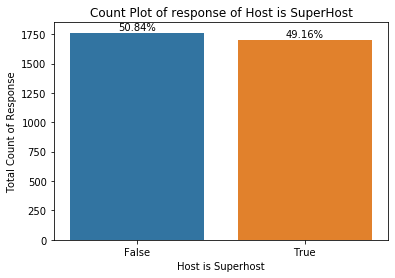

In [5]:
# Visualizing countplot of column 'host_is_superhost'
CountPlot('host_is_superhost',df,'Host is Superhost','Total Count of Response','Count Plot of response of Host is SuperHost')

#### The above count plots shows that 'Host is Superhost' is false as it is about 50.84%

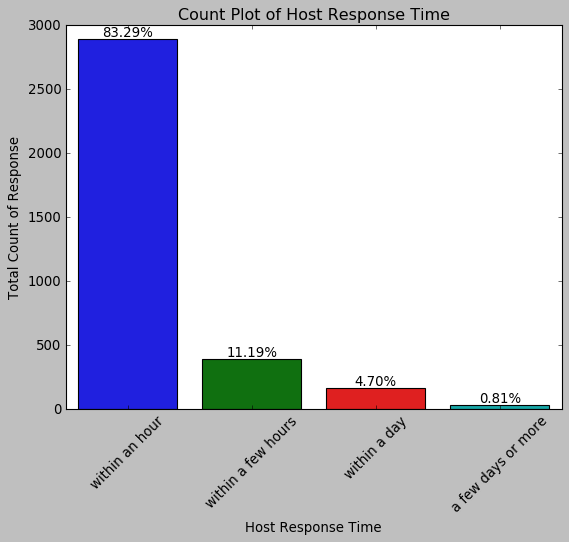

In [153]:
# Visualizing countplot of column 'host_response_time'
CountPlot('host_response_time',df,'Host Response Time','Total Count of Response','Count Plot of Host Response Time',45)

#### The about plot shows that the host response time is heighest with in an hour with 83.29%

In [152]:
# Now creating ETL pipline class which will Extract the csv data, transform into required format and then save the new dataset as csv.
class ETL:
  def __init__(self, Path,Train=True):
    self.df = pd.read_csv(Path)
    self.Train = Train
    self.Transform()
  
  # Method to Transform the data into required format

  def Transform(self):
    # Deleting X1 and id columns as they both are for identification 
    self.df = self.df.drop(['X1','id'],axis=1)

    # Function to Convert the boolean values into Numerical values
    def bool_to_num(x):
      if x==True:
        return 1
      else:
        return 0

    # Applying the bool_to_num function on 'host_is_superhost','host_identity_verified' and 'instant_bookable'
    self.df['host_is_superhost'] = self.df['host_is_superhost'].apply(bool_to_num)
    self.df['host_identity_verified'] = self.df['host_identity_verified'].apply(bool_to_num)
    self.df['instant_bookable'] = self.df['instant_bookable'].apply(bool_to_num)

    # Function to split the number and % and convert it into numerical values
    def percentage_to_num(x):
      return int(x.split('%')[0])

    # Applying the string_to_num function on 'host_response_rate'
    self.df['host_response_rate'] = self.df['host_response_rate'].apply(percentage_to_num)

    # Function to split the number and $ and convert it into numerical values
    def dollar_to_num(x):
      if x == '0':
        return float(x)
      else:
        try:
          return float(x.split('$')[1])
        except:
          return float(x.replace(',' , '').split('$')[1])

    
    # Applying the string_to_num function on 'cleaning_fee' and 'price'
    self.df['cleaning_fee'] = self.df['cleaning_fee'].apply(dollar_to_num)
    if self.Train:
      self.df['price'] = self.df['price'].apply(dollar_to_num)

    # creating instance of labelencoder
    labelencoder = LabelEncoder()

    # Assigning numerical values and storing in same column (host_response_time, neighbourhood_group_cleansed, property_type, room_type, bed_type, cancellation_policy)
    label_encoding_cols = ['host_response_time', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']
    for i in label_encoding_cols:
      self.df[i] = labelencoder.fit_transform(self.df[i])


    # As there are total 178 amenities, we are creating a column in which total amenities of that entry is present.
    # Function to convert amenities column into total amenities present for that entry
    def total_amenities(x):
      total = 0
      z = x.replace('{' , '')
      z = z.replace('}' , '')
      z = z.replace('"' , '').split(',')
      for j in z:
        total = total + 1
      return total

    
    # Applying the total_amenities function on 'amenities'
    self.df['amenities'] = self.df['amenities'].apply(total_amenities)
        

      

  # Function to print and save transformed data
  def Load(self):
    self.df.to_csv("Transformed_Data.csv")
    return self.df

In [8]:
etl = ETL("price_train.csv")

In [9]:
dataset = etl.Load()
dataset.head()

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,0,99,3,521,0,5,6,1,0,47.612163,...,2,2,3,24,129.0,2,1125,1,2,279.0
1,1,100,3,1,1,2,12,14,0,47.640827,...,0,1,3,39,50.0,2,30,1,1,99.0
2,1,100,3,1,0,4,13,11,0,47.549007,...,1,2,3,32,25.0,2,28,0,1,75.0
3,1,90,2,1,1,2,4,14,1,47.601922,...,1,1,3,17,0.0,2,30,0,0,70.0
4,1,100,3,4,1,8,1,14,0,47.552311,...,3,3,3,30,99.0,2,12,0,0,242.0


In [10]:
result = dataset.dtypes
result

host_is_superhost                 int64
host_response_rate                int64
host_response_time                int32
host_listings_count               int64
host_identity_verified            int64
accommodates                      int64
neighbourhood_group_cleansed      int32
property_type                     int32
room_type                         int32
latitude                        float64
longitude                       float64
guests_included                   int64
bathrooms                       float64
bedrooms                          int64
beds                              int64
bed_type                          int32
amenities                         int64
cleaning_fee                    float64
minimum_nights                    int64
maximum_nights                    int64
instant_bookable                  int64
cancellation_policy               int32
price                           float64
dtype: object

In [11]:
dataset_columns = ['host_is_superhost','host_response_rate','host_response_time','host_listings_count','host_identity_verified','accommodates','neighbourhood_group_cleansed','property_type','room_type','latitude','longitude','guests_included','bathrooms','bedrooms','beds','bed_type','amenities','cleaning_fee','minimum_nights','maximum_nights','instant_bookable','cancellation_policy','price']

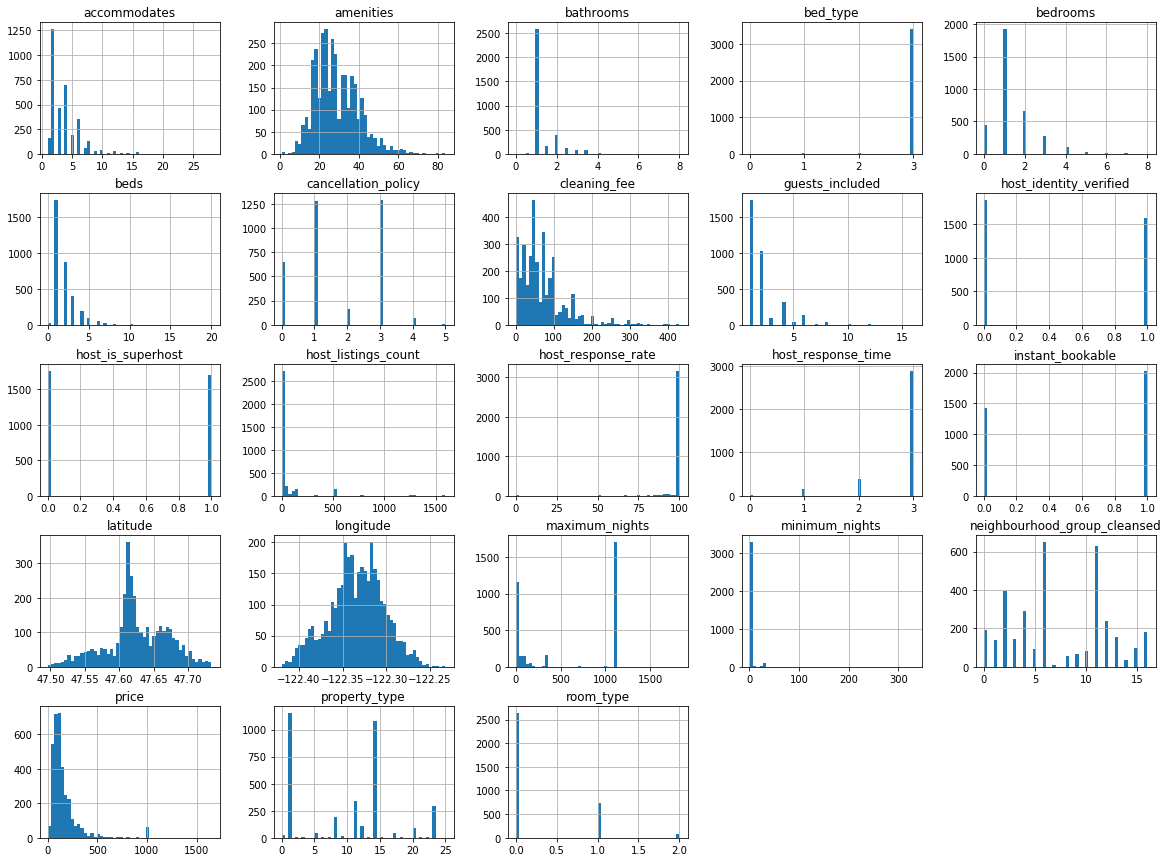

In [14]:
# To plot univariente variables
dataset.hist(bins=50,figsize=(20,15))
plt.show()

In [23]:
#Boxplot visualization price with respect to price variable
def box_plot(x,y):
    for i in x:
        sns.boxplot(x=i, y="price", data=y, hue=i)
        plt.show()

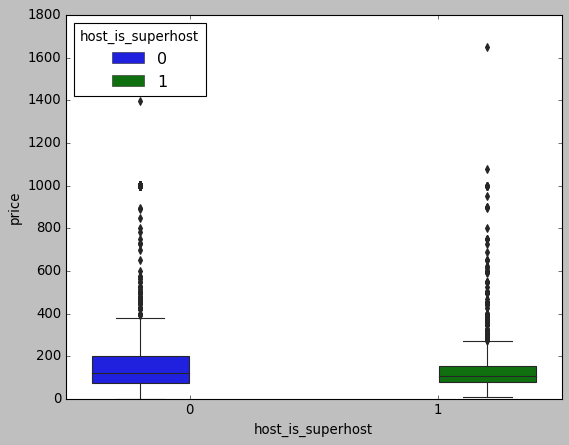

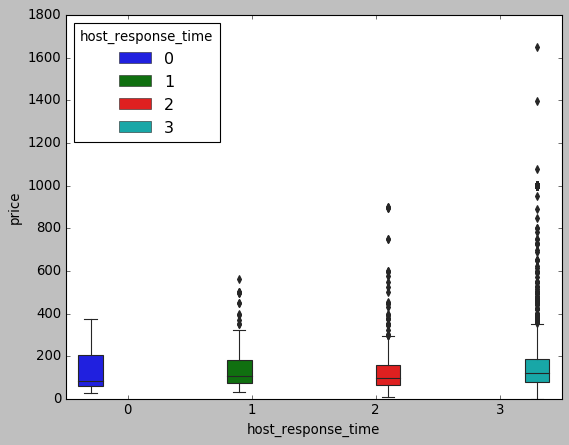

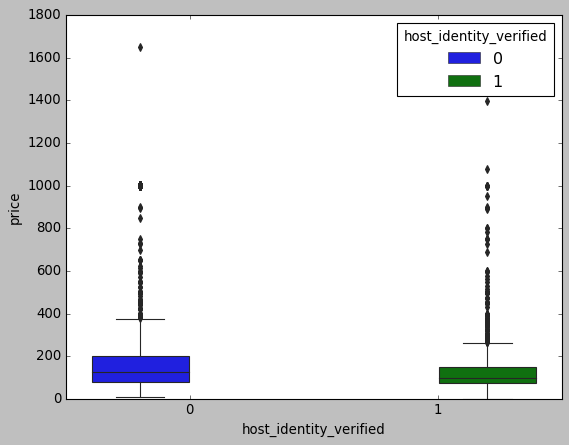

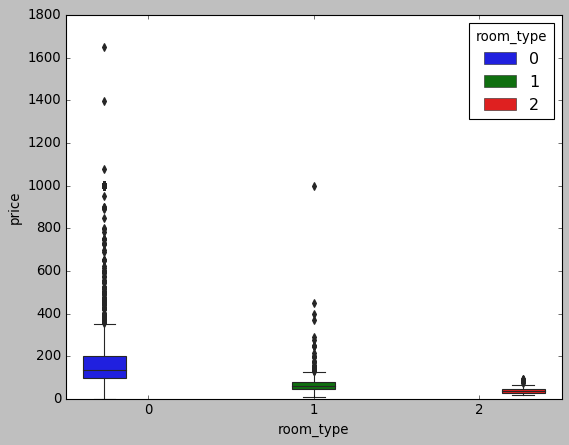

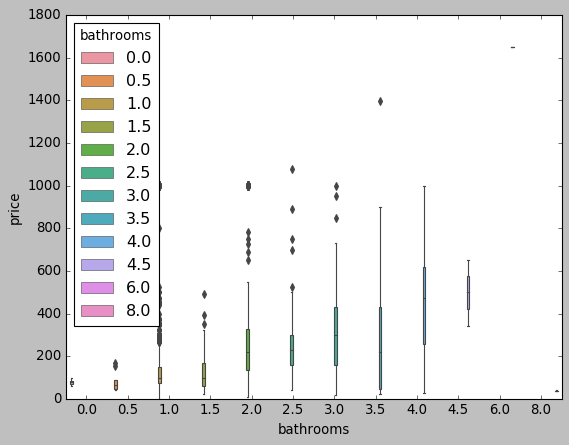

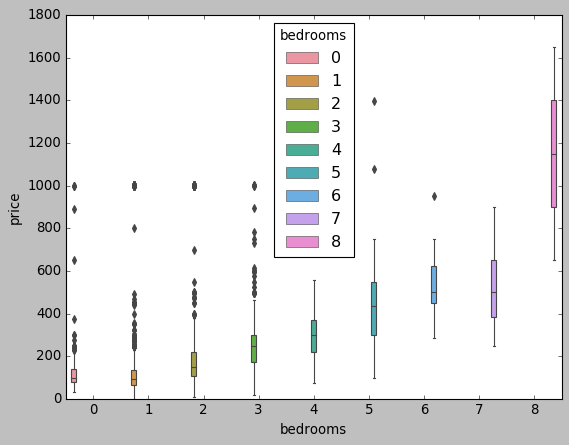

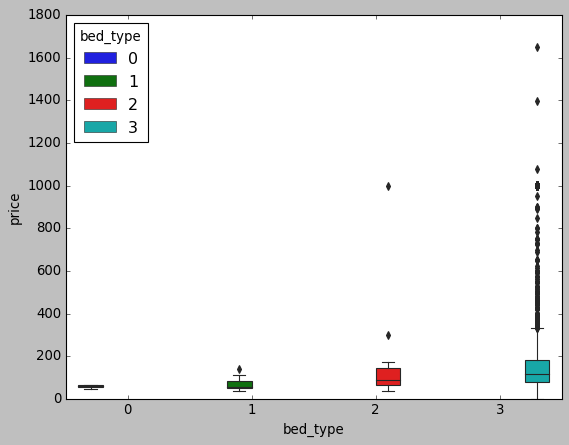

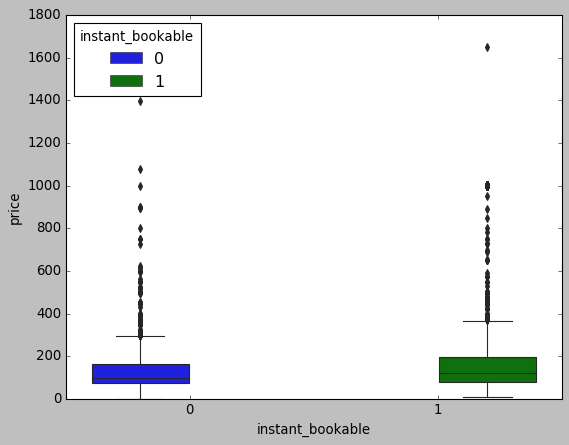

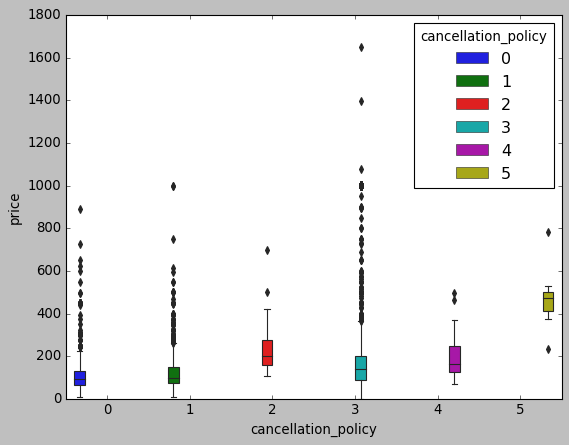

In [154]:
dataset_columns = ['host_is_superhost','host_response_time','host_identity_verified','room_type','bathrooms','bedrooms','bed_type','instant_bookable','cancellation_policy']
box_plot(dataset_columns,dataset)

In [37]:
#Scatterplot visualization price with respect to price variable
def scatter_plot(x,y):
    for i in x:
        sns.catplot(x=i, y="price", data=y)
        plt.show()

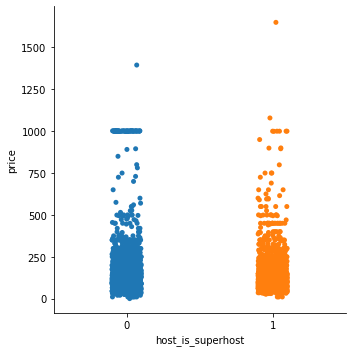

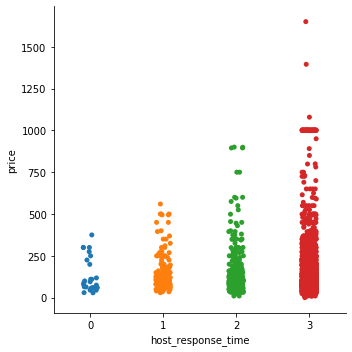

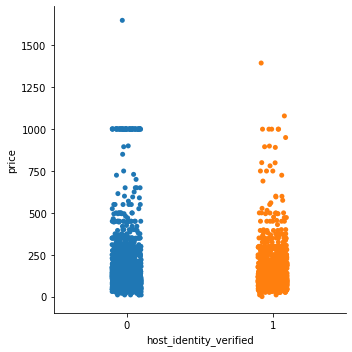

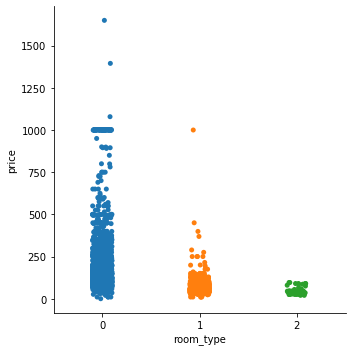

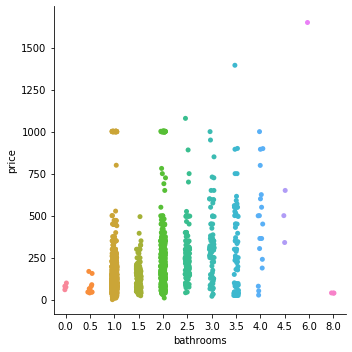

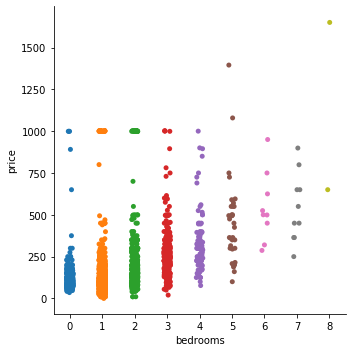

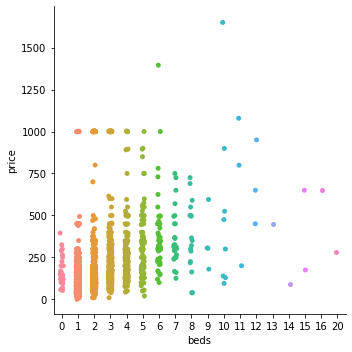

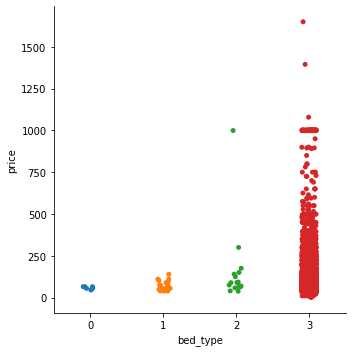

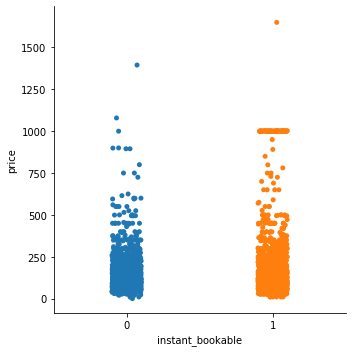

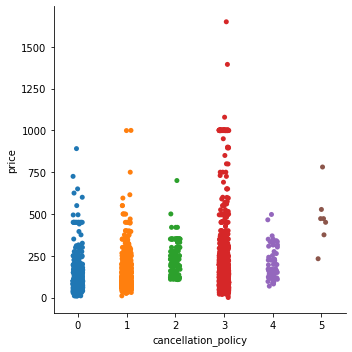

In [38]:
dataset_columns = ['host_is_superhost','host_response_time','host_identity_verified','room_type','bathrooms','bedrooms','beds','bed_type','instant_bookable','cancellation_policy']
scatter_plot(dataset_columns,dataset)

In [43]:
#Barplot visualization price with respect to price variable
def barplot(x,y):
    for i in x:
        sns.catplot(x=i, y="price", kind="bar", data=y)
        plt.show()

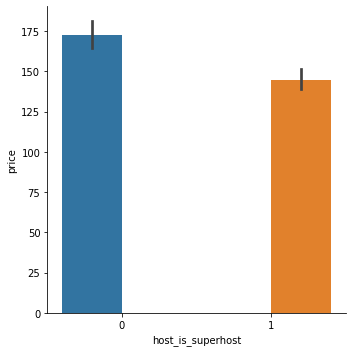

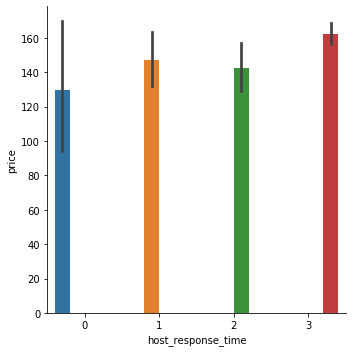

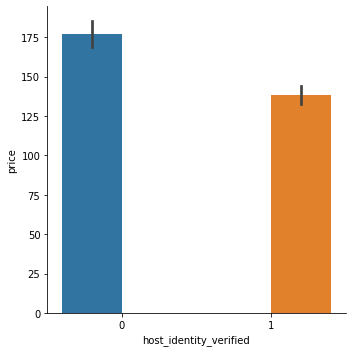

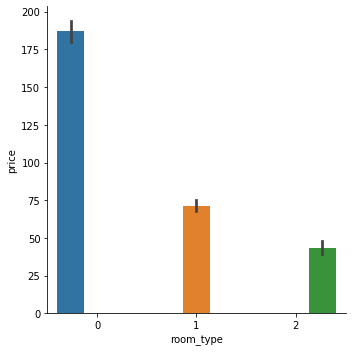

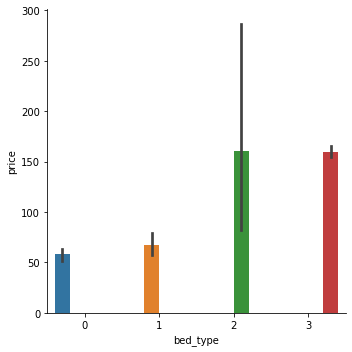

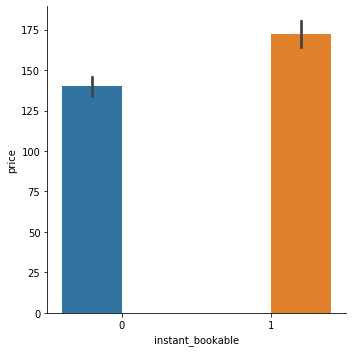

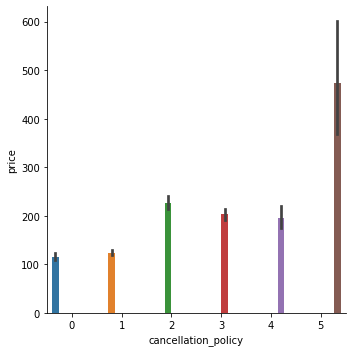

In [45]:
dataset_columns = ['host_is_superhost','host_response_time','host_identity_verified','room_type','bed_type','instant_bookable','cancellation_policy']
barplot(dataset_columns,dataset)

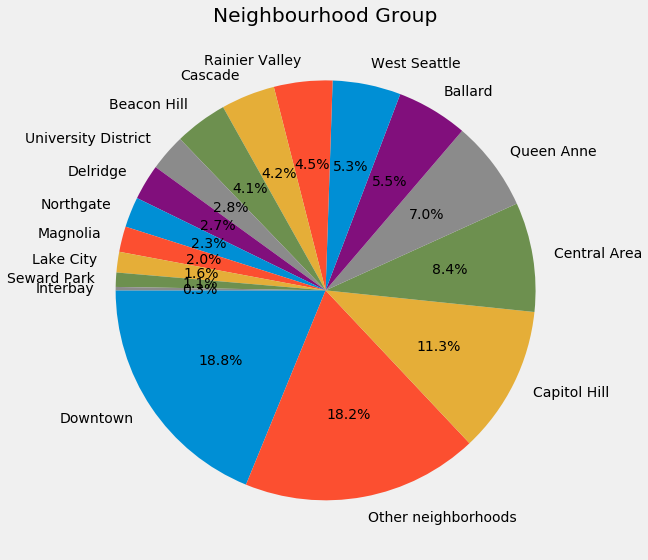

In [65]:
#Pie chart with respect to neighbourhood group
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,9))
plt.title("Neighbourhood Group")
g = plt.pie(dataset.neighbourhood_group_cleansed.value_counts(), labels=df.neighbourhood_group_cleansed.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

#### The above pie chart shows that the heighest neighbourhood group of Airbnb listing is in Downtown and lowest in Interbay

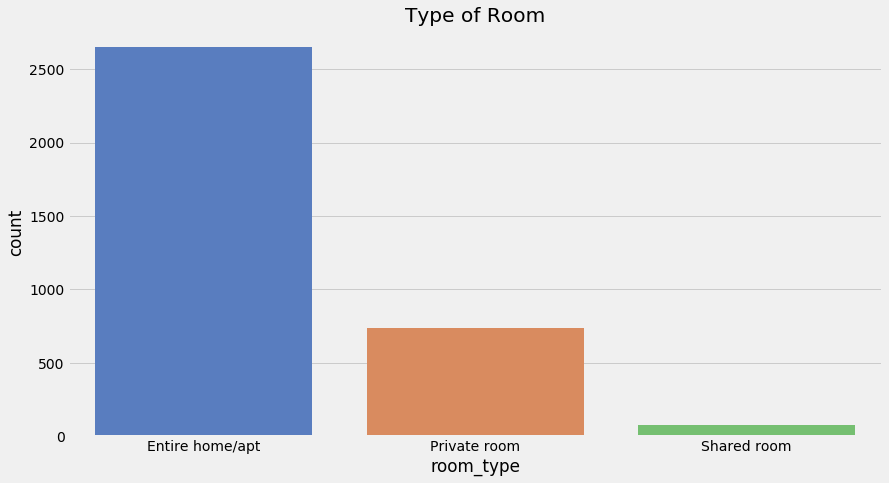

In [64]:
#Barplot for count of Room Types
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

#### The above plot clearly shows that there is a high demand for Entire Home/Apt followed by Private room and the shared room beign the lest preference

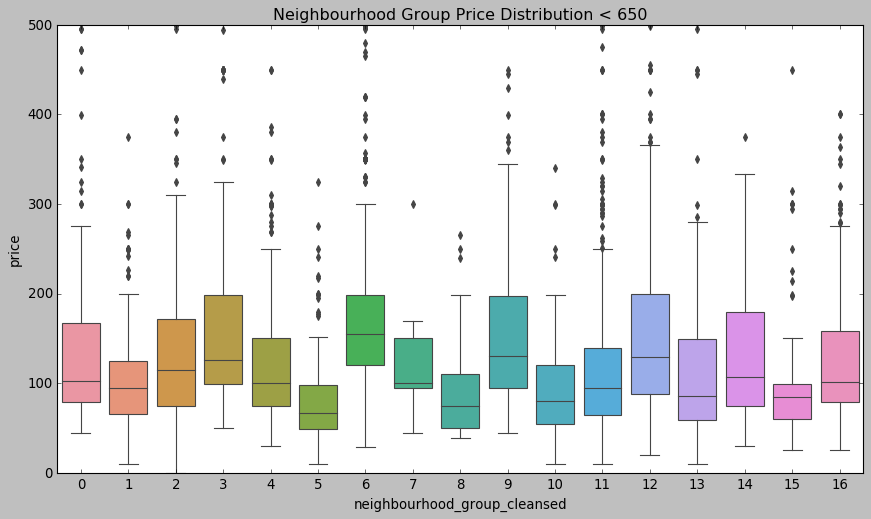

In [90]:
# price group distribution using Box plot
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 650")
sns.boxplot(y="price",x ='neighbourhood_group_cleansed' ,data = dataset[dataset.price<500])
plt.show()

<Figure size 960x720 with 0 Axes>

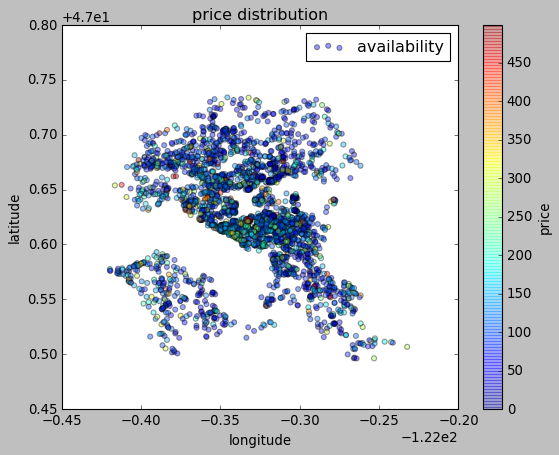

In [185]:
#Plot for neighbourhood price  distribution with respect to price

plt.figure(figsize=(12,9))
ax=dataset[dataset.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability',title='price distribution',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

#### The above plot shows the red dots with heighest price and blue with lowes price

Text(0.5, 1.0, 'Latitude to Longitude for Type of room')

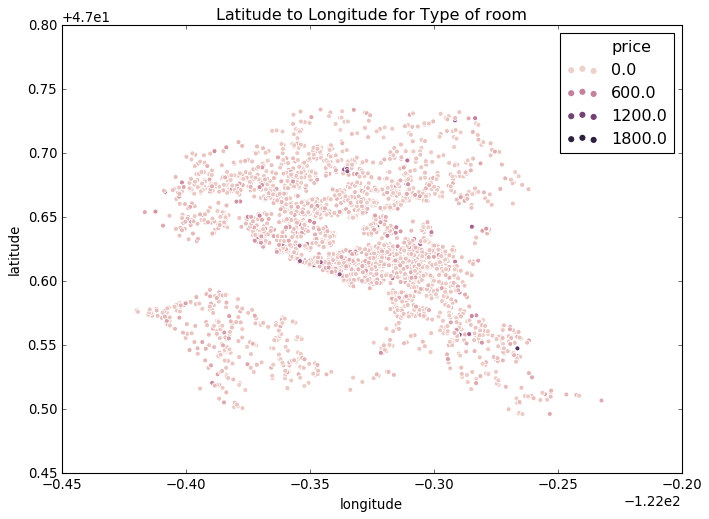

In [184]:
#longitude latitude with respect to price
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(dataset["longitude"], dataset["latitude"], hue=dataset["price"])
plt.title("Latitude to Longitude for Type of room")

#### The above plot shows that Airbnb has most of the room with in price range 0 to 600 dollars.

Text(0.5, 1.0, 'Lattitude to Longitude for Regionname')

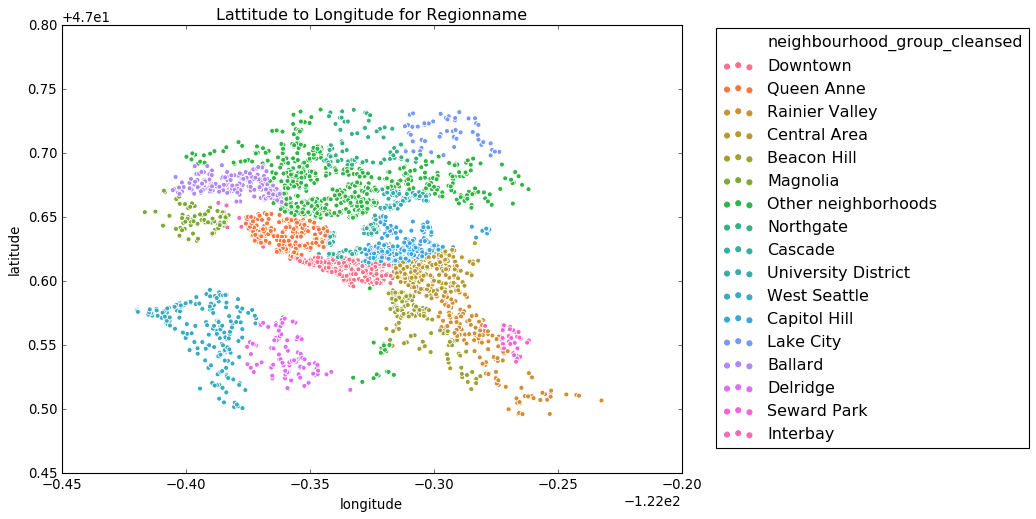

In [95]:
# Airbnb neighbour distribution
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(dataset["longitude"], dataset["latitude"], hue=df["neighbourhood_group_cleansed"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("Lattitude to Longitude for neighbourhood region")

Text(0.5, 1.0, 'Lattitude to Longitude for Type of room')

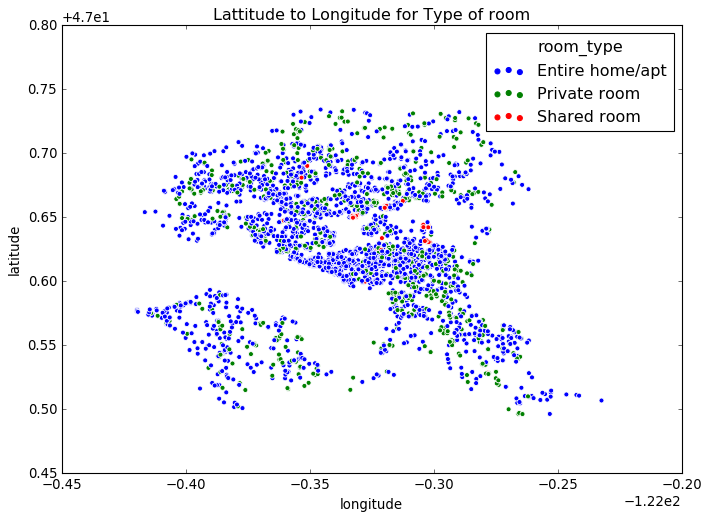

In [99]:
#Distibution with respect to room type
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(dataset["longitude"], dataset["latitude"], hue=df["room_type"])
plt.title("Lattitude to Longitude for Type of room")

Text(0.5, 1.0, 'Price vs room type with respect to Host identity verified')

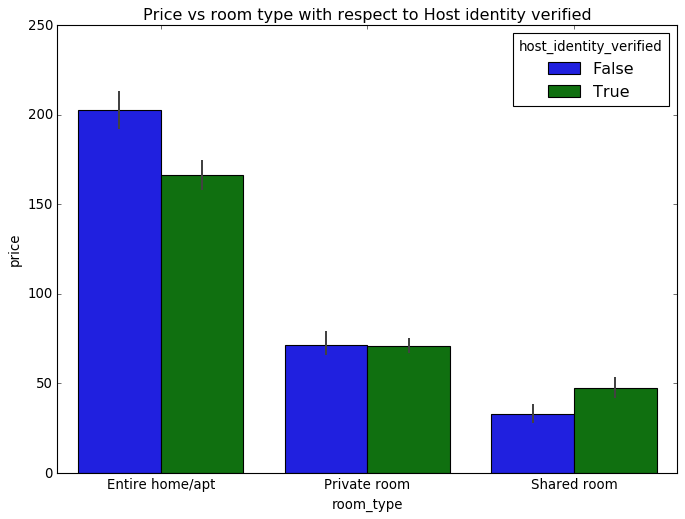

In [162]:
#Distribution of Price vs room type with respect to Host identity verified
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.barplot(df["room_type"], dataset["price"], hue=df["host_identity_verified"])
plt.title("Price vs room type with respect to Host identity verified")

#### The above plot shows that Entire home has highest false verified host identity with respect to price and private rooms has equal verified host identity with moderate price range and shared room has more True verified host identity as compared to false host identity

Text(0.5, 1.0, 'Price vs room type with respect to instant_bookable')

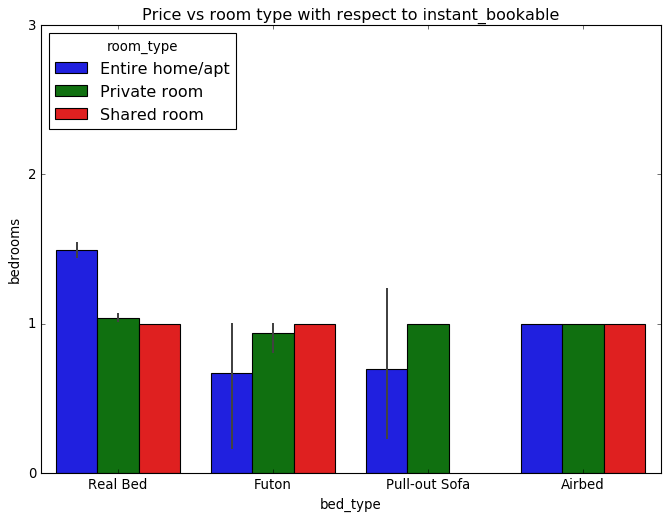

In [180]:
#Distribution of Bed type vs bedrooms with respect to room type
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.barplot(df["bed_type"], dataset["bedrooms"], hue=df["room_type"])
plt.yticks(np.arange(0, 4, 1))
plt.title("Price vs room type with respect to instant_bookable")

#### The above graph shows that Entire home/apt has heighest number of Real Bed bedrooms, Shared room dont have any pull-out sofa where as there are equal number of air bed for all three room types

                              host_is_superhost  host_response_rate  \
host_is_superhost                      1.000000            0.135312   
host_response_rate                     0.135312            1.000000   
host_response_time                     0.093204            0.543633   
host_listings_count                   -0.251724            0.033796   
host_identity_verified                 0.178139           -0.052880   
accommodates                           0.029976            0.027994   
neighbourhood_group_cleansed           0.018114           -0.041255   
property_type                          0.186267            0.012399   
room_type                             -0.050419           -0.016959   
latitude                               0.031472           -0.022824   
longitude                             -0.028175           -0.008856   
guests_included                        0.005917            0.034350   
bathrooms                             -0.051945           -0.008165   
bedroo

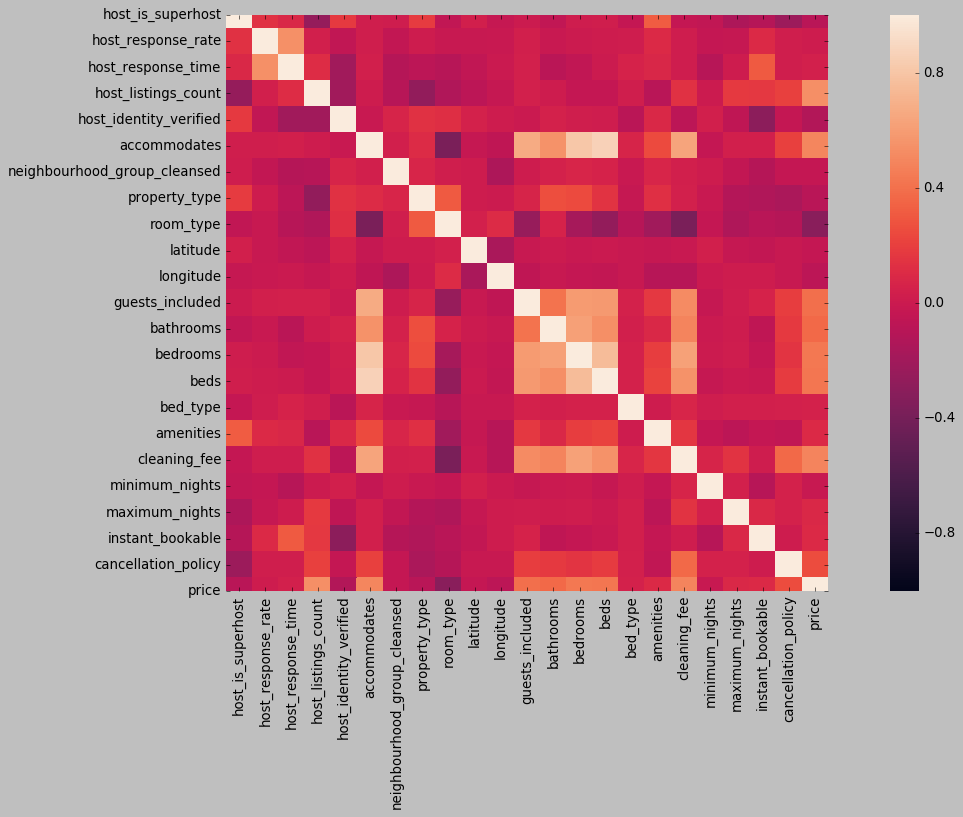

In [118]:
#correlation matrix
def corr(x):
    corrmat = x.corr()
    #corrmat = corrmat.filter()
    print(corrmat)
    f, ax = plt.subplots(figsize=(20, 9))
    sns.heatmap(corrmat, vmax=1,vmin=-1, square=True);
corr(dataset)

In [186]:
# Installing lazy predict on google collab. As lazy predict gives rough idea of the models and their respective accuracies. 
!pip install lazypredict

In [198]:
# Importing required libararies to train the model

import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

ImportError: cannot import name '_check_sample_weight' from 'sklearn.utils.validation' (C:\Users\Jay Dave\Anaconda3\lib\site-packages\sklearn\utils\validation.py)